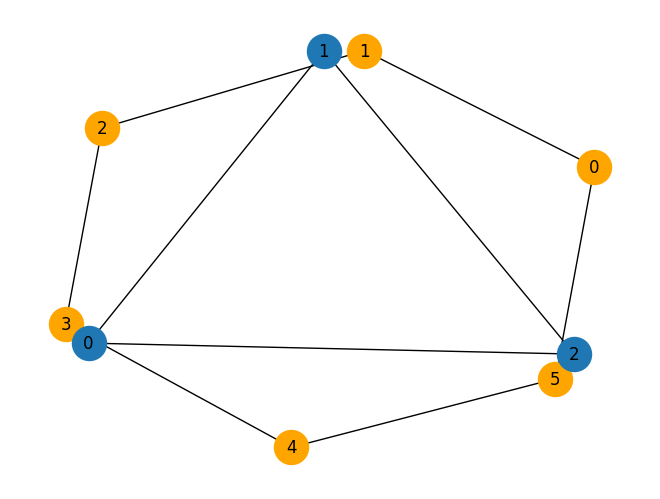

In [75]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np

# m = 10
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (4, 5, 1.0), (5, 6, 1.0), (6, 7, 1.0), (7, 8, 1.0), (8, 9, 1.0), (9, 0, 1.0), (3, 6, 1.0), (4, 7, 1.0), (2, 8, 1.0), (0, 7, 1.0), (6, 8, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 2
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0)]
# h.add_edges_from(e_h_list)
# #draw_graph(h, node_size=600, with_labels=True)

m = 6
g = rx.PyGraph()
g.add_nodes_from(np.arange(0, m, 1))
e_g_list = [(0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0), (4, 5, 1.0), (5, 0, 1.0)]
g.add_edges_from(e_g_list)
draw_graph(g, node_size=600, with_labels=True, node_color='orange')

n = 3
h = rx.PyGraph()
h.add_nodes_from(np.arange(0, n, 1))
e_h_list = [(0, 1, 1.0), (1, 2, 1.0), (0, 2, 1.0)]
h.add_edges_from(e_h_list)
draw_graph(h, node_size=600, with_labels=True)

# m = 12
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0), (4, 5, 1.0), (5, 6, 1.0), (6, 7, 1.0), (7, 8, 1.0), (8, 9, 1.0), (9, 10, 1.0), (10, 11, 1.0), (11, 0, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 2
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

# m = 5
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 3
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0), (0, 2, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

# m = 2
# g = rx.PyGraph()
# g.add_nodes_from(np.arange(0, m, 1))
# e_g_list = [(0, 1, 1.0)]
# g.add_edges_from(e_g_list)
# draw_graph(g, node_size=600, with_labels=True, node_color='orange')

# n = 2
# h = rx.PyGraph()
# h.add_nodes_from(np.arange(0, n, 1))
# e_h_list = [(0, 1, 1.0)]
# h.add_edges_from(e_h_list)
# draw_graph(h, node_size=600, with_labels=True)

In [76]:
e_g = np.zeros((m,m))
for edge in e_g_list:
    e_g[edge[0], edge[1]] = edge[2]
    e_g[edge[1], edge[0]] = edge[2]

e_h = np.zeros((n,n))
for edge in e_h_list:
    e_h[edge[0], edge[1]] = edge[2]
    e_h[edge[1], edge[0]] = edge[2]

print(e_g)
print(e_h)

[[0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [77]:
def degree(graph, vertex):
    return np.sum(graph[vertex])

# Constructing Q
Q = np.zeros((m*n, m*n))
for i in range(m):
    for j in range(m):
        for u in range(n):
            for v in range(n):
                Q[i*n+u, j*n+v] = e_g[i, j] * e_h[u, v]

# Adding penalty for attempting to map input to multiple outputs
# See if this can be balanced for weighted graphs

# Add blocks like 0 & -m & -m \\ -m & 0 & -m \\ -m & -m & 0 (if size of H = 3)
for i in range(m):
    start = i*n
    end = (i+1)*n
    for j in range(start, end):
        for k in range(start, end):
            if j != k:
                Q[j, k] -= degree(e_g, i) * degree(e_h, j - start) # penalty of m outweighs the highest possible reward for assigning an input to two outputs
print(Q)

[[ 0. -4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [-4.  0. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.]
 [-4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1. -4.  0. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1. -4.  0. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  1. -4.  0. -4.  1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0. -4. -4.  0.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0. -4. -4.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.

In [78]:
from qiskit.quantum_info import SparsePauliOp

# see https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm
# H_c = sum Q_{ij}Z_iZ_j + sum b_iZ_i

pauli_list = []
for a in range(len(Q)):
    c = 0
    for b in range(len(Q[a])):
        if Q[a, b] != 0:
            paulis = ["I"] * len(Q)
            paulis[a], paulis[b] = "Z", "Z"
            weight = Q[a, b] # should always be 1 for now
            weight *= -1 # -weight to convert from minimizing problem to maximizing
            pauli_list.append(("".join(paulis), weight))

            c -= Q[a, b] + Q[b, a]
    paulis = ["I"] * len(Q)
    paulis[a] = "Z"
    pauli_list.append(("".join(paulis), -c)) # -c to convert from minimizing problem to maximizing
    
print(pauli_list)
cost_hamiltonian = SparsePauliOp.from_list(pauli_list)
print("Cost Function Hamiltonian:", cost_hamiltonian)

[('ZZIIIIIIIIIIIIIIII', 4.0), ('ZIZIIIIIIIIIIIIIII', 4.0), ('ZIIIZIIIIIIIIIIIII', -1.0), ('ZIIIIZIIIIIIIIIIII', -1.0), ('ZIIIIIIIIIIIIIIIZI', -1.0), ('ZIIIIIIIIIIIIIIIIZ', -1.0), ('ZIIIIIIIIIIIIIIIII', -8.0), ('ZZIIIIIIIIIIIIIIII', 4.0), ('IZZIIIIIIIIIIIIIII', 4.0), ('IZIZIIIIIIIIIIIIII', -1.0), ('IZIIIZIIIIIIIIIIII', -1.0), ('IZIIIIIIIIIIIIIZII', -1.0), ('IZIIIIIIIIIIIIIIIZ', -1.0), ('IZIIIIIIIIIIIIIIII', -8.0), ('ZIZIIIIIIIIIIIIIII', 4.0), ('IZZIIIIIIIIIIIIIII', 4.0), ('IIZZIIIIIIIIIIIIII', -1.0), ('IIZIZIIIIIIIIIIIII', -1.0), ('IIZIIIIIIIIIIIIZII', -1.0), ('IIZIIIIIIIIIIIIIZI', -1.0), ('IIZIIIIIIIIIIIIIII', -8.0), ('IZIZIIIIIIIIIIIIII', -1.0), ('IIZZIIIIIIIIIIIIII', -1.0), ('IIIZZIIIIIIIIIIIII', 4.0), ('IIIZIZIIIIIIIIIIII', 4.0), ('IIIZIIIZIIIIIIIIII', -1.0), ('IIIZIIIIZIIIIIIIII', -1.0), ('IIIZIIIIIIIIIIIIII', -8.0), ('ZIIIZIIIIIIIIIIIII', -1.0), ('IIZIZIIIIIIIIIIIII', -1.0), ('IIIZZIIIIIIIIIIIII', 4.0), ('IIIIZZIIIIIIIIIIII', 4.0), ('IIIIZIZIIIIIIIIIII', -1.0), ('IIIIZIIIZIIIIIIII

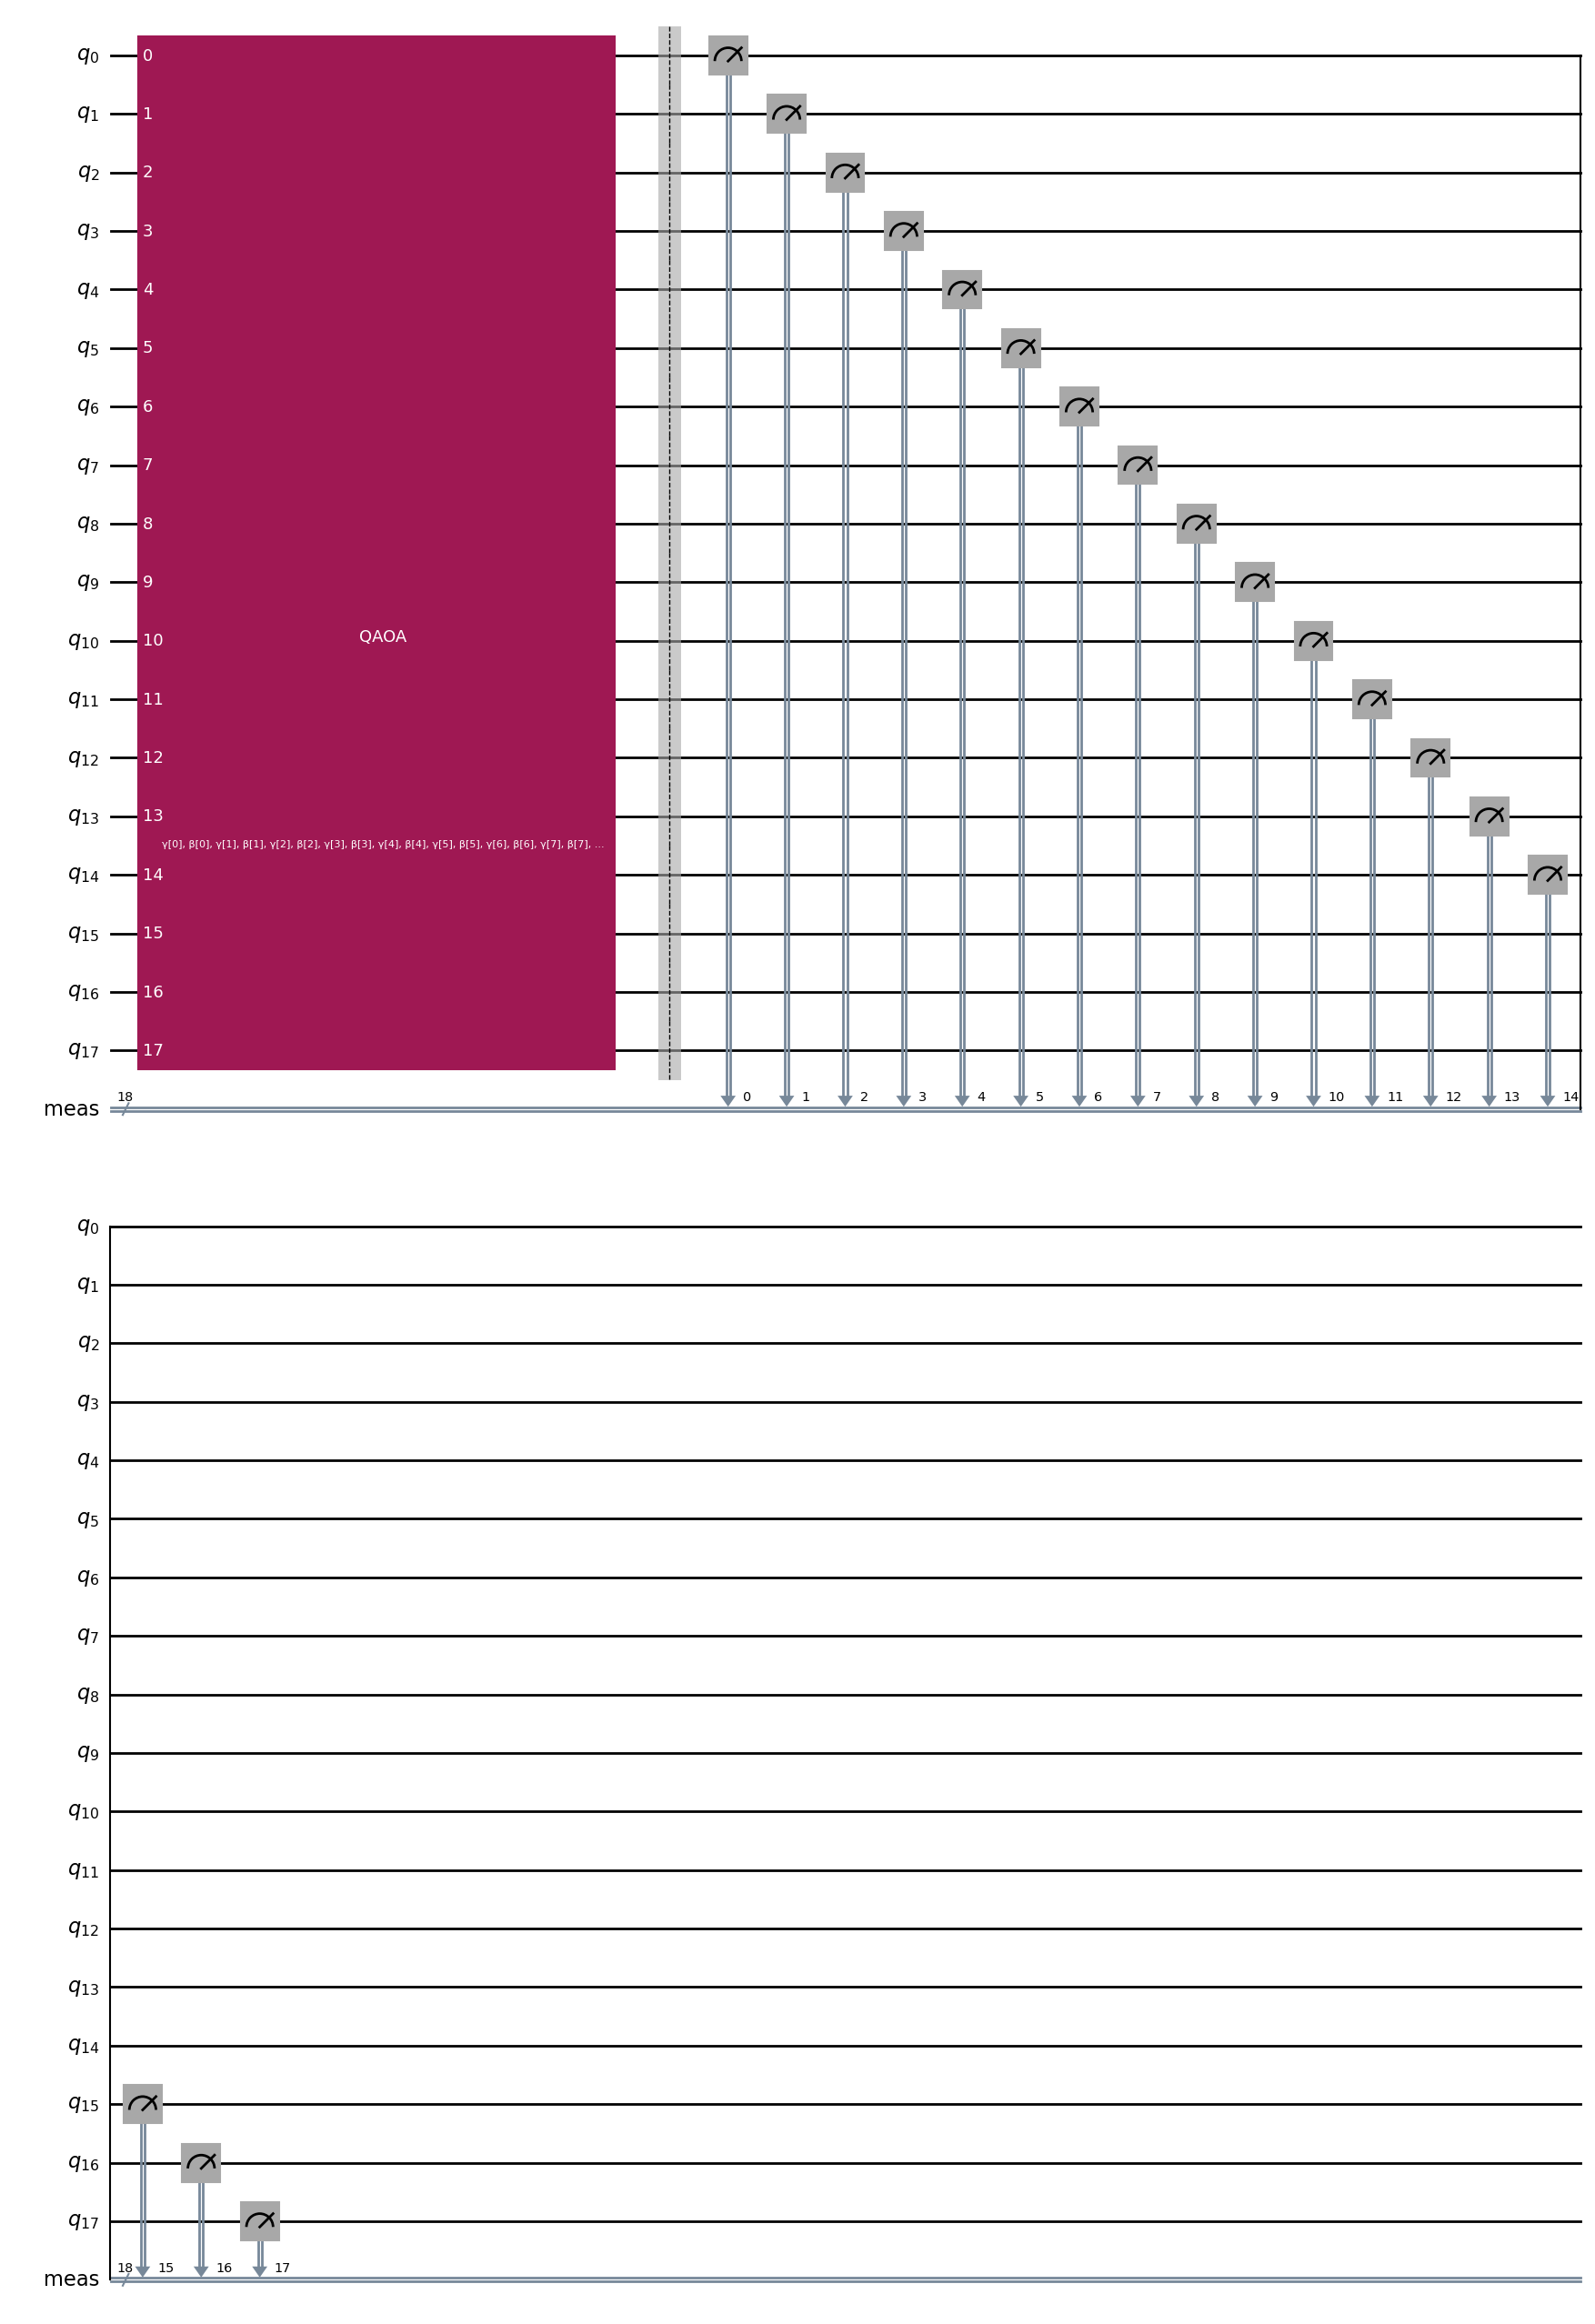

In [79]:
from qiskit.circuit.library import QAOAAnsatz

reps = 10
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=reps)
circuit.measure_all()

circuit.draw('mpl')
#circuit.parameters

In [52]:
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# # QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum')
# backend = service.least_busy(min_num_qubits=127)
# print(backend)

# # Create pass manager for transpilation
# pm = generate_preset_pass_manager(optimization_level=3,
#                                     backend=backend)

# candidate_circuit = pm.run(circuit)
# candidate_circuit.draw('mpl', fold=False, idle_wires=False)

In [80]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

backend = AerSimulator()
print(backend)

# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3,
                                    backend=backend)

candidate_circuit = pm.run(circuit)
#candidate_circuit.draw('mpl', fold=False, idle_wires=False)

AerSimulator('aer_simulator')


In [81]:
initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta] * reps

In [82]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)
    print(cost)


    return cost

0.4140625
-0.6328125
-1.33203125
-0.919921875
0.380859375
-0.94140625
0.521484375
-0.19140625
0.287109375
-0.27734375
-0.01171875
-17.404296875
-9.076171875
-15.3359375
-16.63671875
-16.884765625
-18.080078125
-16.4765625
-17.248046875
-15.1640625
-17.306640625
3.439453125
1.25
-1.91015625
0.498046875
-7.111328125
-17.080078125
-15.544921875
-1.30859375
-16.87109375
2.759765625
-15.845703125
-7.65625
-9.763671875
29.18359375
-20.103515625
-8.38671875
-20.6171875
-2.306640625
-22.529296875
10.44140625
-23.20703125
-10.1328125
-26.3984375
-4.2578125
-13.4609375
0.140625
-25.349609375
1.763671875
0.064453125
5.47265625
-3.35546875
-26.60546875
-20.669921875
-24.66796875
24.24609375
-25.166015625
11.435546875
-28.833984375
-24.23046875
-13.029296875
3.267578125
14.107421875
3.443359375
-25.11328125
7.513671875
3.07421875
4.8515625
-11.134765625
-24.18359375
-10.248046875
-25.984375
20.953125
-28.0703125
-19.857421875
-27.841796875
5.626953125
-25.345703125
-3.330078125
9.5546875
-25.550781

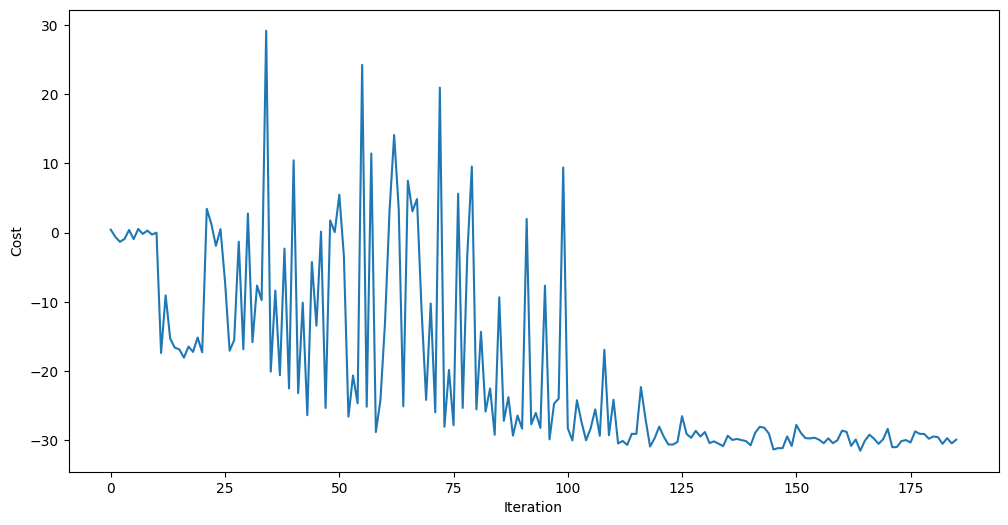

In [83]:
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize
import matplotlib.pyplot as plt

objective_func_vals = [] # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    # estimator.options.default_shots = 1000

    # Set simple error suppression/mitigation options
    # estimator.options.dynamical_decoupling.enable = True
    # estimator.options.dynamical_decoupling.sequence_type = "XY4"
    # estimator.options.twirling.enable_gates = True
    # estimator.options.twirling.num_randomizations = "auto"

    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-3,
    )
    #print(result)

plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [84]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)
#optimized_circuit.draw('mpl', fold=False, idle_wires=False)

In [85]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

/home/cab3/code/cmsc320/.venv/lib/python3.8/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:268: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XY4'}, 'twirling': {'enable_gates': True, 'num_randomizations': 'auto'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


{218283: 0.0003, 47618: 0.0001, 82580: 0.0001, 33867: 0.0001, 83740: 0.0001, 52450: 0.0005, 82948: 0.0004, 2301: 0.0001, 218653: 0.0002, 132195: 0.0002, 22288: 0.0001, 82700: 0.0004, 59444: 0.0001, 7780: 0.0001, 35562: 0.0001, 243885: 0.0001, 137610: 0.0001, 205313: 0.0002, 212036: 0.0001, 255799: 0.0001, 0: 0.0064, 249711: 0.0001, 16128: 0.0001, 68040: 0.0001, 233375: 0.0001, 7456: 0.0001, 91020: 0.0001, 158065: 0.0001, 124925: 0.0001, 220289: 0.0001, 97400: 0.0001, 218627: 0.0001, 141411: 0.0002, 66496: 0.0001, 5120: 0.0004, 237041: 0.0001, 123788: 0.0002, 146530: 0.0002, 212236: 0.0001, 58128: 0.0002, 151938: 0.0001, 19212: 0.0001, 1248: 0.0002, 148956: 0.0001, 84: 0.0006, 28935: 0.0001, 112404: 0.0001, 40446: 0.0002, 146091: 0.0001, 229448: 0.0001, 237047: 0.0001, 66221: 0.0002, 108394: 0.0001, 172142: 0.0001, 65697: 0.0001, 98513: 0.0001, 9: 0.0002, 6393: 0.0002, 1872: 0.0002, 116717: 0.0001, 34986: 0.0001, 2161: 0.0001, 201379: 0.0002, 243831: 0.0005, 27984: 0.0001, 228977: 0.000

In [88]:
top_n = 10

def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = [(keys[i], values[i]) for i in np.argsort(np.abs(values))][:-top_n-1:-1]
most_likely_bitstring = [(to_bitstring(key, len(Q))[::-1], value) for (key, value) in most_likely]

for bit_string in most_likely_bitstring:
    print("Bitstring: ", bit_string)

Bitstring:  ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0064)
Bitstring:  ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 0.0014)
Bitstring:  ([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], 0.0013)
Bitstring:  ([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], 0.0012)
Bitstring:  ([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.0011)
Bitstring:  ([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], 0.0011)
Bitstring:  ([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 0.001)
Bitstring:  ([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.001)
Bitstring:  ([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 0.001)
Bitstring:  ([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], 0.0009)


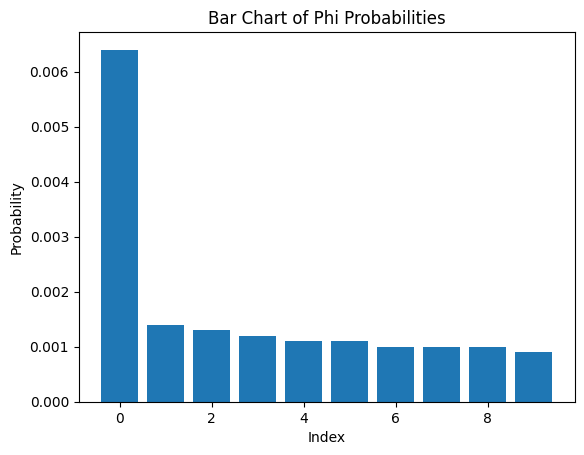


Index 0:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Index 1:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Index 2:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Index 3:
[[1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]]

Index 4:
[[0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]

Index 5:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Index 6:
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

Index 7:
[[1. 0. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Index 8:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Index 9:
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [89]:
most_likely_key_only = [key for (key, value) in most_likely_bitstring]
most_likely_value_only = [value for (key, value) in most_likely_bitstring]

plt.bar(range(len(most_likely_value_only)), most_likely_value_only)

# Add labels
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Bar Chart of Phi Probabilities")
plt.show()

hom = np.zeros((top_n, m, n))
for k in range(top_n):
    for i in range(m):
        for j in range(n):
            hom[k][i, j] = most_likely_key_only[k][i*n + j]
    print(f"\nIndex {k}:")
    print(hom[k])

In [63]:
def first_nonzero(array):
    for i in range(len(array)):
        if array[i] != 0:
            return i
    return None

def edge_in_graph(g, tup):
    if tup == None:
        return 0
    return g[tup[0]][tup[1]]

def edge_across_hom(hom, v1, v2):
    if first_nonzero(hom[v1]) == None or first_nonzero(hom[v2]) == None:
        return None
    return (first_nonzero(hom[v1]), first_nonzero(hom[v2]))

print(f'G:\n{e_g}')
print(f'H:\n{e_h}')

max = 0
max_index = 0
for h in range(len(hom)):
    total = 0
    for i in range(m):
        for j in range(m):
            term = edge_in_graph(e_g, (i,j)) * edge_in_graph(e_h, edge_across_hom(hom[h], i, j))
            total += term
            if term == 1 and h == 1:
                #print(f'Edge in G: ({i}, {j}), edge in H: ({edge_across_hom(hom[h], i, j)})')
                pass
            if i == 2 and j == 3:
                #print(f'(2, 3) Edge in H: ({edge_across_hom(hom[h], i, j)})')
                pass
    #print(f'Value: {total}')
    if total > max:
        max = total
        max_index = h

print(f'Best hom ({max // 2}):\n{hom[max_index]}')

G:
[[0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
H:
[[0. 1.]
 [1. 0.]]
Best hom (12.0):
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
